# <center>Data Science Lab Homework 4 </center>
##### <center>Group 13 </center>

### <b>Question</b>

Download Heart Disease data from [https://archive.ics.uci.edu/datasets](https://archive.ics.uci.edu/datasets) and apply depth based classifier, SVM based classifier, K-NN based classifier (choose K with proper justification), Kernel density function based classifier on the aforesaid two data sets and compute empirical miss-classification probability for each classifier.

### <b>Introduction</b>

#### <b>SVM-based Classifier</b>
A Support Vector Machine (SVM) algorithm is a non-probabilistic classifier aiming to generate hyperplanes that divide the data points of two classes in the vector space. 
It is a supervised machine learning algorithm used for classification and regression tasks. It’s particularly effective in high-dimensional spaces and in cases where the number of dimensions is greater than the number of samples.
The image below shows how "support" vectors are calculated such that the margin (or distance) between the vectors of two classes is the most. SVM optimizes this margin metric to find the best hyperplane for all the categories that's why SVMs are popular for disease prediction since they can effectively categorize tabular data into different categories.

<div style="text-align:center">
    <img src="./SVM_for_Heart_Disease_Prediction.png" alt="SVM Illustration">
</div>

#### <b>Depth-based Classifier</b>
Depth-based classifiers, such as decision trees and random forests, are powerful machine learning algorithms commonly used for both classification and regression tasks. Decision trees recursively partition the feature space based on individual feature values, providing an interpretable sequence of if-else conditions. However, they can over-fit when the tree grows too deep. In contrast, random forests are ensembles of decision trees trained on random subsets of the data and features, mitigating overfitting by aggregating predictions. Both algorithms find applications in classification and regression tasks, with decision trees being interpretable and random forests offering enhanced generalization capabilities.

#### <b>Kernel Density Function-based Classifier</b>
Kernel density-based classifiers are non-parametric techniques used for density estimation and classification tasks. In classification, kernel density estimation is used to model the conditional probability distributions of different classes, and the class of a new data point is determined based on which class has the highest density at that point. Kernel density-based classifiers are particularly useful when dealing with data distributions that are not easily modeled by parametric methods and can handle complex, multi-modal data distributions. 

#### <b>KNN-based Classifier</b>
The k-Nearest Neighbors (k-NN) algorithm is a versatile machine learning technique used for classification and regression tasks. It determines the class or predicts the value of a new data point by examining the labels or values of its k nearest neighbors in the feature space, based on a distance metric such as Euclidean distance. While simple to implement and understand, k-NN's computational cost can be high for large datasets, and the choice of the parameter k is crucial for its performance. 

### <b> Comparing Different Machine Learning Models</b>

Comparing different machine learning models involves evaluating their performance using various metrics and then selecting the model that performs the best according to your criteria. We'll be making confusion matrix for all the models and calculate it's accuracy, precision, recall and F1 score.

* <b>Accuracy:</b> Accuracy measures the proportion of correct predictions among the total number of predictions. It gives an overall measure of correctness but may not be suitable for imbalanced datasets. It's calculated as: 
$$Accuracy = \frac{True\ Positives + True\ Negatives}{True\ Positives + True\ Negatives + False\ Positives + False\ Negatives}$$

* <b>Precision:</b> Precision measures the proportion of true positive predictions among the total number of positive predictions. It provide insights into how well the model identifies positive instances and avoids false positives. It's calculated as: 
$$Precision = \frac{True\ Positives}{True\ Positives + False\ Positives}$$

* <b>Recall(Sensitivity)</b> Recall measures the proportion of true positive predictions among the total number of actual positive instances. It provide insights into how well the model identifies positive instances and avoids false negatives. It's calculated as:
$$Recall = \frac{True\ Positives}{True\ Positives + False\ Negatives}$$

* <b>F1 Score:</b> The F1 score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. It balances precision and recall and can be useful when you want to consider both false positives and false negatives. 
It's calculated as:
$$F1 \ Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

As in our case we want to minimize chances of a false positives as they can lead to unnecessary anxiety, additional medical tests, treatments, and healthcare costs for patients who do not have the disease. So we are gonna prioritize on increasing precision along with accuracy.

### <b>Different Machine Learning Approaches on Heart Disease Dataset

To test out the how different models perform on this task, we will be using the <b>UCI Heart Disease</b> having 14 features and 303 samples.

First we load all the Python's necessary libraries crucial for our machine learning models.

In [4]:
%%capture
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.neighbors import KernelDensity
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV

warnings.filterwarnings('ignore')

Next, we load our dataset

In [5]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets

Checking for NA values

In [6]:
print(X.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


We'll replace all the missing values of both features by mode values. As the number of NA values are pretty less in comparison to total number of samples we can also either drop these samples containing NA values or can use some machine learning algorithm to predict them. 

In [7]:
# Replacing NA values

# Replace missing values in 'ca' with the mode
median_ca = X['ca'].mode()[0]
X.fillna({'ca':median_ca}, inplace=True)

# Replace missing values in 'thal' with the mode
mode_thal = X['thal'].mode()[0]
X.fillna({'thal':mode_thal}, inplace=True)

In [8]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

Now, there are no missing values.Before moving, we must perform exploratory data analysis (EDA) on the dataset we just loaded. Let's take a look at first few samples of our dataset.

In [9]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


We see that some of them are categorical variables. The basics of feature engineering and data science tell us that such columns need to be encoded to avoid unintentional bias. For example, as shown below, columns like chest pain (cp), restecg, slope, ca and thal need to be one-hot encoded in addition to others.
Moreover, the columns of age, cholesterol (chol), Rest BP (trestbps), thalach, and oldpeak need to be normalized.

In [10]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_columns = list(set(X.columns) - set(categorical_columns))

In [11]:
def z_score_normalize(x):
    mean = np.mean(x, axis=0)
    std_dev = np.std(x, axis=0)

    x_normal = (x-mean)/std_dev
    return x_normal

In [12]:
for col in numerical_columns:
    X[col] = z_score_normalize(X[col])

for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

y = pd.Series(np.where(y['num']<1, 0, 1))

columns = [1, 3, 5, 6, 7]
for i in columns:
    temp = pd.get_dummies(X[categorical_columns[i]], prefix=categorical_columns[i]).astype(int)
    X = pd.concat([X, temp], axis=1)
    X = X.drop(categorical_columns[i], axis=1)


After applying one hot-encoding and normalization the dataset looks like the below:

In [13]:
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,0.948726,1,0.757525,-0.264900,1,0.017197,0,1.087338,1,0,...,0,0,1,1,0,0,0,0,1,0
1,1.392002,1,1.611220,0.760415,0,-1.821905,1,0.397182,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1.392002,1,-0.665300,-0.342283,0,-0.902354,1,1.346147,0,0,...,0,1,0,0,0,1,0,0,0,1
3,-1.932564,1,-0.096170,0.063974,0,1.637359,0,2.122573,0,0,...,0,0,1,1,0,0,0,1,0,0
4,-1.489288,0,-0.096170,-0.825922,0,0.980537,0,0.310912,0,1,...,1,0,0,1,0,0,0,1,0,0


Now we are ready to train our model on this dataset.
Next, we use the train_test_split function from sklearn to create a train and a testing subset of the ratio 80 to 20.

In [42]:
#Splitting dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random state is fixed so that train and test data are reproducible

In [37]:
# #Creating function to create plot for confusion matrix

# def plot_confusion(cm):
#     plt.figure(figsize=(6, 4))
#     sns.set(font_scale=1) # Adjust font size
#     sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
#                 xticklabels=['Predicted Negative', 'Predicted Positive'], 
#                 yticklabels=['Actual Negative', 'Actual Positive'])
#     plt.xlabel('Predicted Label')
#     plt.ylabel('True Label')
#     plt.title('Confusion Matrix')
#     plt.show()

#### <b>SVM-based Classifier</b>
The svm.SVC function in sklearn has several hyperparameters. We explore the primary ones: choice of kernel, regularization, and degree of the polynomial kernel.

In [13]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for i in range(len(kernels)):
    svc_scores_c = []
    for ch in range(1,11):
        if kernels[i] == 'poly':
            svc_scores_poly=[]
            for d in range(3, 10):
               svc_classifier = svm.SVC(kernel = kernels[i], C=ch, degree=d)
               svc_classifier.fit(X_train, y_train)
               svc_scores_poly.append(svc_classifier.score(X_test, y_test))
            print(f'Best Polynomial score: {np.argmax(svc_scores_poly)+3}')
            svc_scores_c.append(svc_scores_poly[np.argmax(svc_scores_poly)])
        else:
            svc_classifier = svm.SVC(kernel = kernels[i], C=ch)
            svc_classifier.fit(X_train, y_train)
            svc_scores_c.append(svc_classifier.score(X_test, y_test))
    print(f'Best choice of c for {kernels[i]}: {np.argmax(svc_scores_c)+1}')
    svc_scores.append(svc_scores_c[np.argmax(svc_scores_c)])
print(f'Best choice of k: {kernels[np.argmax(svc_scores)]}')

Best choice of c for linear: 1
Best Polynomial score: 3
Best Polynomial score: 4
Best Polynomial score: 3
Best Polynomial score: 3
Best Polynomial score: 3
Best Polynomial score: 3
Best Polynomial score: 6
Best Polynomial score: 6
Best Polynomial score: 6
Best Polynomial score: 6
Best choice of c for poly: 2
Best choice of c for rbf: 2
Best choice of c for sigmoid: 2
Best choice of k: rbf


test_accuracy =  0.8026315789473685
0.8


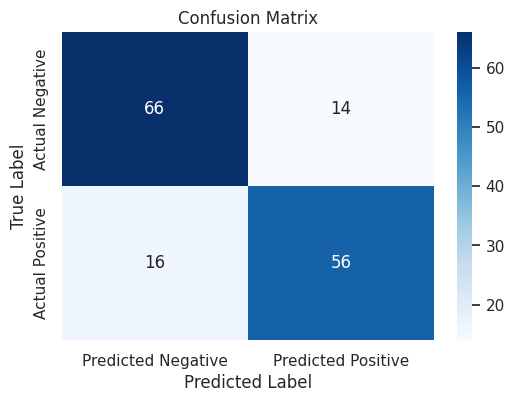

In [39]:
svm_classifier = svm.SVC(kernel='rbf', C=2)
svm_classifier.fit(X_train, y_train)

out = svm_classifier.predict(X_test)
out2 = svm_classifier.predict(X_train)

test_accuracy = accuracy_score(y_test, out)
print('test_accuracy = ', test_accuracy)
# 0.8852459016393442

test_precision = precision_score(y_test, out)
print(test_precision)
# 0.9032258064516129

del(out, out2, test_accuracy)

We find that the best kernel choice is 'RBF', with regularization parameter being 2.0.
This choice of hyperparameters gives 88.5% accuracy and 90.3% precision on the test set.

#### <b>Depth-based Classifier</b>
For Depth based classifer we are using Random Forest Classifier, and we need to tune the `n_estimators` parameter on tree level

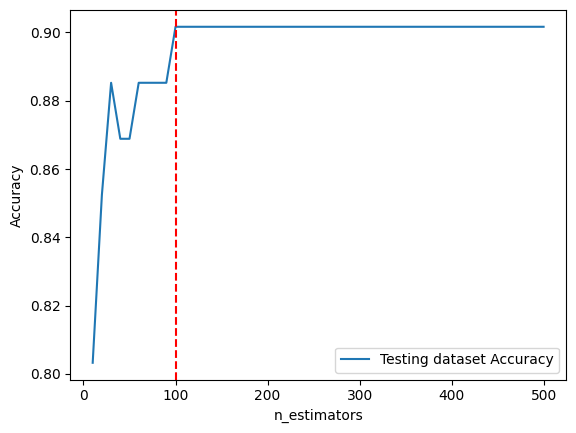

Best choice of n_estimators: 100


In [14]:
rf_scores = []

for param in range(10, 510, 10):
    rf = RandomForestClassifier(n_estimators=param, random_state=42)
    rf.fit(X_train, y_train)
    rf_scores.append(rf.score(X_test, y_test))

plt.plot(range(10, 510, 10), rf_scores, label = 'Testing dataset Accuracy')

plt.legend() 
plt.xlabel('n_estimators') 
plt.ylabel('Accuracy') 
plt.axvline(x=(np.argmax(rf_scores)+1)*10, color='red', linestyle='--')
plt.show()

print(f'Best choice of n_estimators: {(np.argmax(rf_scores)+1)*10}')


In [43]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
print(rf_classifier.score(X_test, y_test))
# 0.9016393442622951

pred = rf_classifier.predict(X_test)
print(precision_score(y_test, pred))
# 0.9333333333333333

0.9016393442622951
0.9333333333333333


With the choice of 100 estimators, our random forest classifier gives around 90.1% accuracy and 93.3% precision on the test set.

#### <b>Kernel Density Function-based Classifier</b>
For this we making different training dataset based on target class, and name them as `X_train_0` and `X_train_1` for class 0 and 1 respectively.

In [24]:
#HIDE
class KernelDensityClassifier:
    def __init__(self):
        self.kde_0 = KernelDensity()
        self.kde_1 = KernelDensity()

    def train(self, X_0, X_1):
        self.kde_0.fit(X_0)
        self.kde_1.fit(X_1)

    def predict(self, X):
        log_likelihood_0 = self.kde_0.score_samples(X)
        log_likelihood_1 = self.kde_1.score_samples(X)
        return (log_likelihood_1 > log_likelihood_0).astype(int)

In [25]:
#HIDE
# making different training datasets based on class
class_0 = y_train.index[y_train==0]
class_1 = y_train.index[y_train==1]

X_train_0 = X.iloc[class_0]
X_train_1 = X.iloc[class_1]

In [27]:
# %%capture
kdc = KernelDensityClassifier()
kdc.train(X_train_0, X_train_1)

pred = kdc.predict(X_test)
print(accuracy_score(y_test, pred))
# 0.8852459016393442

print(precision_score(y_test, pred))
# 0.9032258064516129

0.8852459016393442
0.9032258064516129


Kernel Density Classifier gives us around 88.5% accuracy and 90.3% precision on test set.

#### <b>KNN-based Classifier</b>
Using the KNeighborsClassifier module from sklearn, we build a KNN model and iteratively tune the hyperparameter `n_neighbors` (number of neighbours to be checked for every data point).

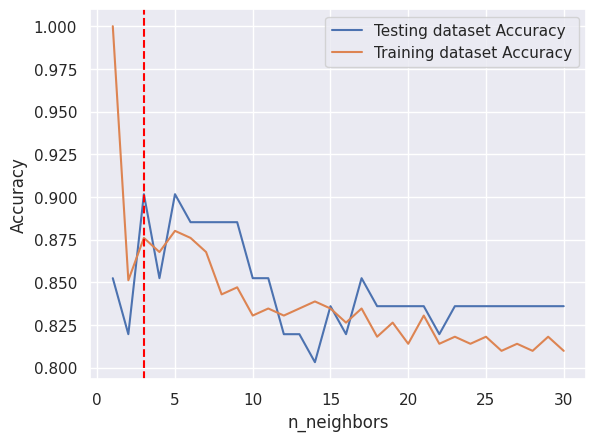

Best choice of neighbors is  3


In [44]:
train_accuracy = np.empty(30) 
test_accuracy = np.empty(30) 
  
# Selecting optimal value by looping over K values 
for k in range(1, 31): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute training and test data accuracy 
    train_accuracy[k-1] = knn.score(X_train, y_train) 
    test_accuracy[k-1] = knn.score(X_test, y_test) 
  
# Generate plot 
plt.plot(range(1, 31), test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(range(1, 31), train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.axvline(x=np.argmax(test_accuracy)+1, color='red', linestyle='--')
plt.show()

print("Best choice of neighbors is ", np.argmax(test_accuracy)+1)

We see that the best choice of `n_neighbors` is 3, and the accuracy of this model is around 90.2%

In [47]:
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))
# 0.9016393442622951

pred = knn.predict(X_test)
print(precision_score(y_test, pred))
# 0.9333333333333333

0.9016393442622951
0.9333333333333333


### <b>Box plots on Accuracy of various model
Now we check the accuracy of our final models at different splits of our dataset like 90/10, 80/20, 70/30, 60/40 and 50/50.
The we make a box plot out of them.

In [48]:
#HIDE
proportion = [0.1, 0.2, 0.3, 0.4, 0.5]
test_acc_svm = []
test_acc_rf = []
test_acc_kd = []
test_acc_knn = []

test_precision_svm = []
test_precision_rf = []
test_precision_kd = []
test_precision_knn = []


for prop in proportion:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=prop, random_state=42)

    svm_classifier = svm.SVC(kernel='rbf', C=2)
    svm_classifier.fit(X_train, y_train)
    pred = svm_classifier.predict(X_test)
    test_acc_svm.append(accuracy_score(y_test, pred))
    test_precision_svm.append(precision_score(y_test, pred))

    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    pred = rf_classifier.predict(X_test)
    test_acc_rf.append(accuracy_score(y_test, pred))
    test_precision_rf.append(precision_score(y_test, pred))

    X_train_0 = X.iloc[y_train.index[y_train==0]]
    X_train_1 = X.iloc[y_train.index[y_train==1]]
    kdc = KernelDensityClassifier()
    kdc.train(X_train_0, X_train_1)
    pred = kdc.predict(X_test)
    test_acc_kd.append(accuracy_score(pred, y_test))
    test_precision_kd.append(precision_score(y_test, pred))

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    test_acc_knn.append(accuracy_score(pred, y_test))
    test_precision_knn.append(precision_score(y_test, pred))

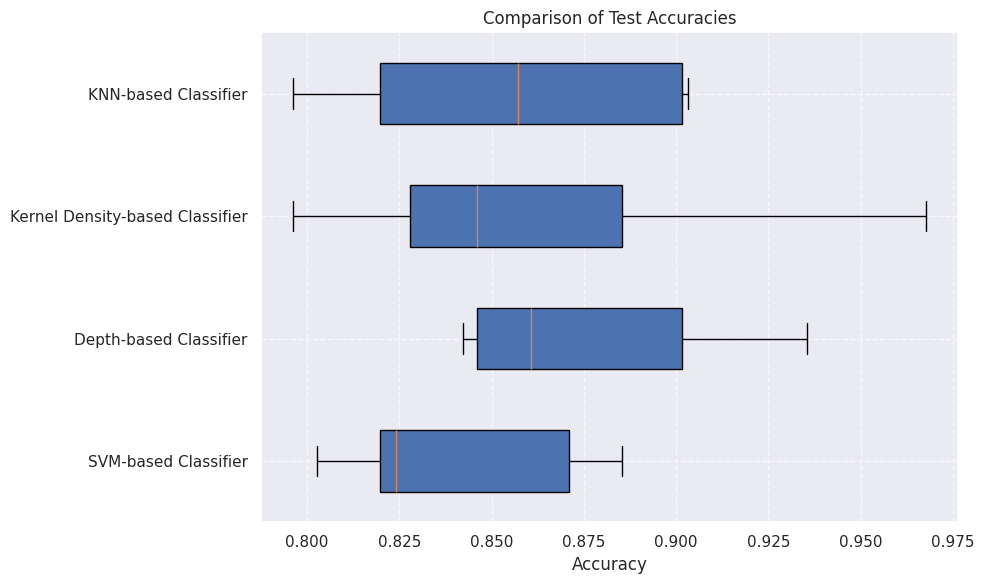

In [49]:
#HIDE
# Combine data
acc_data = [test_acc_svm, test_acc_rf, test_acc_kd, test_acc_knn]
precision_data = [test_precision_svm, test_precision_rf, test_precision_kd, test_precision_knn]

# Plot
plt.figure(figsize=(10, 6))

plt.boxplot(acc_data, vert=False, patch_artist=True, widths=0.5)
plt.yticks([1, 2, 3, 4], ['SVM-based Classifier', 'Depth-based Classifier', 'Kernel Density-based Classifier', 'KNN-based Classifier'])
plt.xlabel('Accuracy')
plt.title('Comparison of Test Accuracies')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

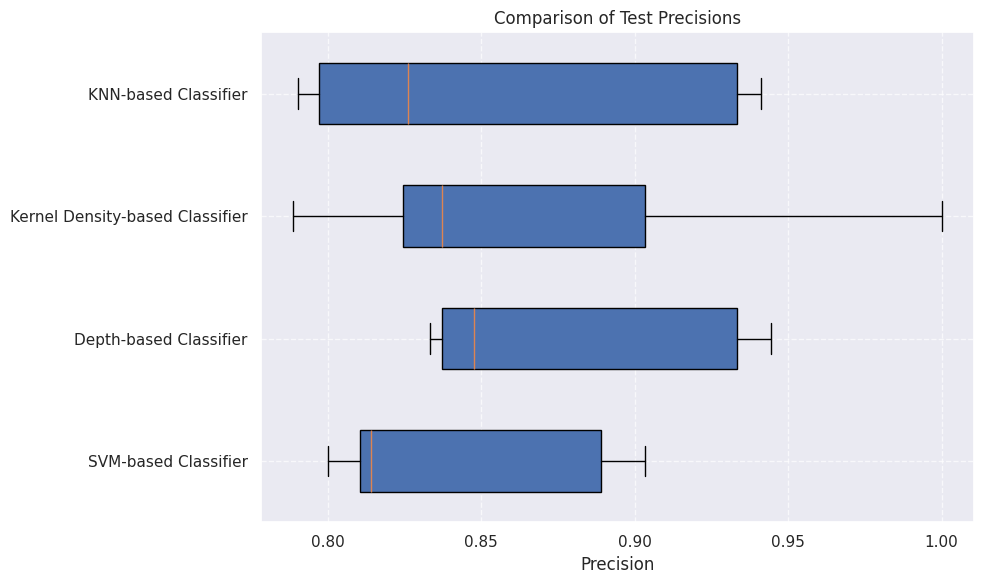

In [50]:
# Combine data
precision_data = [test_precision_svm, test_precision_rf, test_precision_kd, test_precision_knn]

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(precision_data, vert=False, patch_artist=True, widths=0.5)
plt.yticks([1, 2, 3, 4], ['SVM-based Classifier', 'Depth-based Classifier', 'Kernel Density-based Classifier', 'KNN-based Classifier'])
plt.xlabel('Precision')
plt.title('Comparison of Test Precisions')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
#HIDE
# Combine data
data = [test_acc_svm, test_acc_rf, test_acc_kd, test_acc_knn]

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False, patch_artist=True, widths=0.5)
plt.yticks([1, 2, 3, 4], ['SVM-based Classifier', 'Depth-based Classifier', 'Kernel Density-based Classifier', 'KNN-based Classifier'])
plt.xlabel('Accuracy')
plt.title('Comparison of Test Accuracies')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

After trying four different machine learning techniques to predict heart disease, it is clear that Depth
<b>Based(Random Forest) Classifier</b> perform the best on average on our UCI dataset. However, feature
engineering and hyperparameter tuning in other models can also yield comparable results.